In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
!!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: {"username":"rishov0007","key":"acb7f1e004d7082834d57206e1319e25"}
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
cnn = tf.keras.models.load_model('/content/modelPlant_Acc98.2.keras')

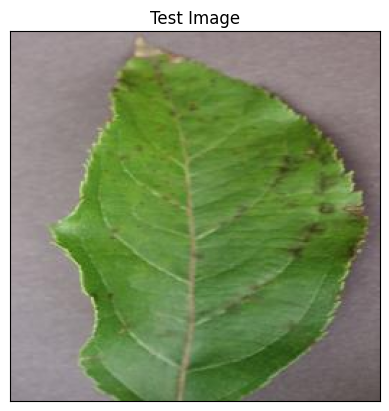

In [5]:
#Test Image Visualization
import cv2
import matplotlib.pyplot as plt

image_path = '/content/new-plant-diseases-dataset/test/test/AppleScab1.JPG'

# Reading an image in default mode
img = cv2.imread(image_path)

# Check if image was loaded successfully
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

    # Displaying the image
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()
else:
    print(f"Error: Could not load image from path: {image_path}")
    print("Please check if the file path is correct and the image exists.")

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


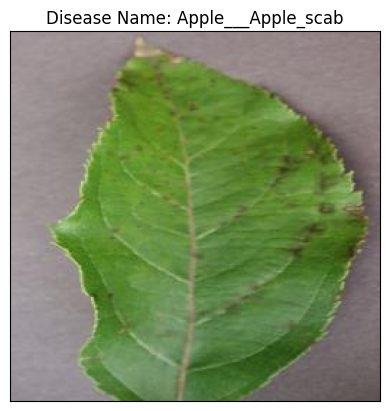

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
class_names = validation_set.class_names
class_name_dict = {i: name for i, name in enumerate(class_names)}

print(class_name_dict)
num_classes = len(class_names)
print(num_classes)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [13]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained CNN model and class names (replace with your model and class list)

image_dir = '/content/new-plant-diseases-dataset/test/test/'

# Function to predict the disease for a single image
def predict_disease(image_path):
    try:
        image = load_img(image_path, target_size=(224, 224))
        input_arr = img_to_array(image)
        input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch.
        predictions = cnn.predict(input_arr)
        result_index = np.argmax(predictions)
        predicted_disease = class_name[result_index]

        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            print(f"Warning: Could not load image for display: {image_path}")
            img = None

        return predicted_disease, img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

# Iterate through images in the directory and predict
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_dir, filename)
        predicted_disease, img = predict_disease(image_path)

        if predicted_disease:
            print(f"Image: {filename}")
            print(f"Predicted Disease: {predicted_disease}")

            if img is not None:
                plt.imshow(img)
                plt.title(f"Predicted Disease: {predicted_disease}")
                plt.axis('off')
                plt.show()


Output hidden; open in https://colab.research.google.com to view.